# **Detección de Fraude con Tarjetas de Crédito usando Árboles de Decisión y SVM**

En este laboratorio consolidarás tus habilidades en modelado de aprendizaje automático (ML) utilizando dos modelos de clasificación populares para identificar transacciones fraudulentas con tarjetas de crédito. Estos modelos son: Árbol de Decisión y Máquina de Vectores de Soporte (SVM).

Usarás un conjunto de datos real de transacciones con tarjetas de crédito para entrenar cada uno de estos modelos. Luego, emplearás el modelo entrenado para evaluar si una transacción con tarjeta de crédito es fraudulenta o no.

Objetivos:

Realizar un preprocesamiento básico de datos en Python

Modelar una tarea de clasificación utilizando las APIs de Python de Scikit-Learn

Entrenar modelos de Máquina de Vectores de Soporte (SVM) y Árbol de Decisión usando Scikit-Learn

Ejecutar inferencias y evaluar la calidad de los modelos entrenados

<div id="Introducción"> <h2>Introducción</h2> <br>Imagina que trabajas para una institución financiera y parte de tu trabajo consiste en construir un modelo que prediga si una transacción con tarjeta de crédito es **fraudulenta** o no. Puedes modelar este problema como un **problema de clasificación binaria**. Una transacción pertenece a la **clase positiva (1)** si es un fraude, de lo contrario pertenece a la **clase negativa (0)**. <br> <br>Tienes acceso a transacciones ocurridas durante un cierto período de tiempo. La mayoría de las transacciones son normalmente legítimas y solo una pequeña fracción no lo es. Por lo tanto, típicamente se tiene acceso a un **conjunto de datos altamente desbalanceado**. Este es también el caso del conjunto de datos actual: solo **492 transacciones de 284,807** son fraudulentas (la clase positiva - los fraudes - representa el 0.172% de todas las transacciones). <br> <br>Este es un conjunto de datos de **Kaggle**. Puedes encontrar este dataset de "Detección de Fraude con Tarjetas de Crédito" en el siguiente enlace: <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">Credit Card Fraud Detection</a>. <br> <br>Para entrenar el modelo, puedes usar una parte del conjunto de datos de entrada, mientras que los datos restantes pueden utilizarse para evaluar la **calidad del modelo entrenado**. Primero, vamos a importar las bibliotecas necesarias y descargar el conjunto de datos. <br> </div>

In [1]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

# read the input data
raw_data=pd.read_csv(url)
raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<div id="dataset_analysis">
    <h2>Analísis de información</h2>
</div>

Cada fila del conjunto de datos representa una transacción con tarjeta de crédito. Como se muestra arriba, cada fila tiene 31 variables. Una variable (la última en la tabla anterior) se llama Class y representa la variable objetivo. Tu objetivo será entrenar un modelo que use las demás variables para predecir el valor de la variable Class. Primero, obtengamos estadísticas básicas sobre la variable objetivo.

Nota: Por razones de confidencialidad, los nombres originales de la mayoría de las características están anonimizados como V1, V2 … V28. Los valores de estas características son el resultado de una transformación PCA y son numéricos. La característica 'Class' es la variable objetivo y toma dos valores: 1 en caso de fraude y 0 en caso contrario. Para más información sobre el conjunto de datos, visita esta página web: Credit Card Fraud Detection
.

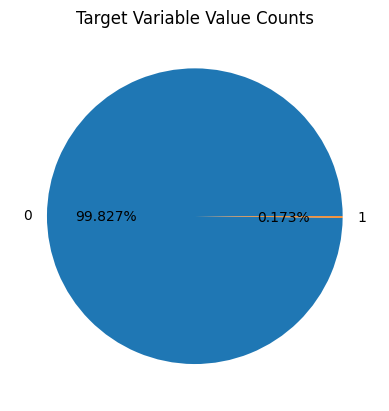

In [3]:
labels = raw_data.Class.unique()

# get the count of each class
sizes = raw_data.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

Como se mostró anteriormente, la variable Class tiene dos valores: 0 (la transacción con tarjeta de crédito es legítima) y 1 (la transacción con tarjeta de crédito es fraudulenta). Por lo tanto, necesitas modelar un problema de clasificación binaria.

Además, el conjunto de datos está altamente desbalanceado, las clases de la variable objetivo no están representadas de manera equitativa. Este caso requiere atención especial al entrenar o al evaluar la calidad del modelo. Una forma de manejar este escenario durante el entrenamiento es ajustar el modelo para que preste más atención a las muestras de la clase minoritaria. Los modelos de este estudio se configurarán para tener en cuenta los pesos de las clases de las muestras durante el entrenamiento (train/fit).

También es recomendable entender qué características afectan al modelo y de qué manera. Podemos visualizar el efecto de las diferentes características sobre el modelo usando el siguiente código.

<Axes: >

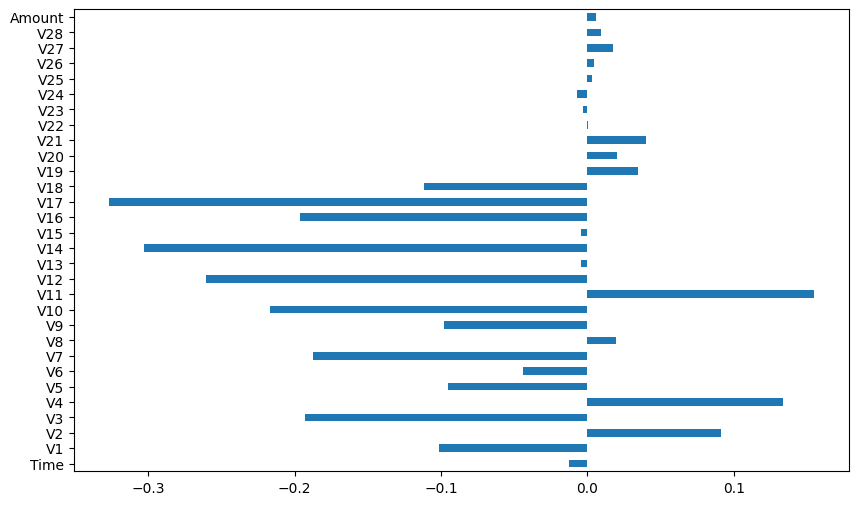

In [4]:
correlation_values = raw_data.corr()['Class'].drop('Class')
correlation_values.plot(kind='barh', figsize=(10, 6))

Esto muestra claramente que algunas características afectan la variable objetivo Class más que otras. Para un modelado eficiente, podríamos usar únicamente las características más correlacionadas.

<div id="preprocesamiento_del_dataset"> <h2>Preprocesamiento del Conjunto de Datos</h2> </div>

You will now prepare the data for training. You will apply standard scaling to the input features and normalize them using $L_1$ norm for the training models to converge quickly. As seen in the data snapshot, there is a parameter called `Time` which we will not be considering for modeling. Hence, features 2 to 30 will be used as input features and feature 31, i.e. Class will be used as the target variable.

In [5]:
raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(raw_data.iloc[:, 1:30])
data_matrix = raw_data.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

<div id="division_dataset"> <h2>División del Conjunto de Datos en Entrenamiento/Prueba</h2> </div>

Ahora que el conjunto de datos está listo para construir los modelos de clasificación, primero necesitas dividir el conjunto de datos preprocesado en un subconjunto que se utilizará para entrenar el modelo (conjunto de entrenamiento) y un subconjunto que se usará para evaluar la calidad del modelo (conjunto de prueba).

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<div id="dt_sklearn"> <h2>Construir un modelo de Clasificador de Árbol de Decisión con Scikit-Learn</h2> </div>

Calcula los pesos de las muestras que se usarán como entrada en la rutina de entrenamiento, de manera que se tenga en cuenta el desbalance de clases presente en este conjunto de datos.

In [7]:
w_train = compute_sample_weight('balanced', y_train)

Usando estos pesos de las muestras, podemos entrenar el clasificador de Árbol de Decisión. También tomamos nota del tiempo que tarda en entrenarse este modelo para compararlo más adelante con el SVM en el laboratorio.

In [8]:
# for reproducible output across multiple function calls, set random_state to a given integer value
dt = DecisionTreeClassifier(max_depth=4, random_state=35)

dt.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

<div id="svm_sklearn"> <h2>Construir un modelo de Máquina de Vectores de Soporte (SVM) con Scikit-Learn</h2> </div>

A diferencia de los Árboles de Decisión, no es necesario definir un sample_weight separado para las SVM. Podemos simplemente pasar un parámetro en la función de Scikit-Learn.

In [9]:
# for reproducible output across multiple function calls, set random_state to a given integer value
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

<div id="dt_sklearn_snapml"> <h2>Evaluar los Modelos de Clasificador de Árbol de Decisión</h2> </div>

Run the following cell to compute the probabilities of the test samples belonging to the class of fraudulent transactions.

In [11]:
y_pred_dt = dt.predict_proba(X_test)[:,1]

Usando estas probabilidades, podemos evaluar el Área Bajo la Curva ROC (ROC-AUC) como métrica de desempeño del modelo.
La puntuación AUC-ROC evalúa la capacidad de tu modelo para distinguir entre las clases positiva y negativa considerando todos los posibles umbrales de probabilidad. Cuanto mayor sea su valor, mejor se considera que el modelo es para separar las dos clases.

In [12]:
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))

Decision Tree ROC-AUC score : 0.939


<div id="svm_sklearn_snap"> <h2>Evaluar los Modelos de Máquina de Vectores de Soporte (SVM)</h2> </div>

Ejecuta la siguiente celda para calcular las probabilidades de que las muestras de prueba pertenezcan a la clase de transacciones fraudulentas.

In [13]:
y_pred_svm = svm.decision_function(X_test)

Ahora puedes evaluar la precisión del SVM en el conjunto de prueba en términos de la puntuación ROC-AUC.

In [14]:
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

SVM ROC-AUC score: 0.986


## Ejercicios de Práctica

Basándote en lo que has aprendido en este laboratorio, intenta resolver las siguientes preguntas.

P1. Actualmente, hemos utilizado las 30 características del conjunto de datos para entrenar los modelos.
Usa la función corr() para encontrar las 6 características más importantes del conjunto de datos y entrenar los modelos con ellas.

In [15]:
correlation_values = abs(raw_data.corr()['Class']).drop('Class')
correlation_values = correlation_values.sort_values(ascending=False)[:6]
correlation_values

V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
Name: Class, dtype: float64

P2. Usando únicamente estas 6 características, modifica la variable de entrada para el entrenamiento.

In [ ]:
X = data_matrix[:,[3,10,12,14,16,17]]

P3. Ejecuta el modelo de Árbol de Decisión con esta variable de entrada modificada.
¿Cómo cambia el valor de la métrica ROC-AUC?

Deberías observar un aumento en el valor de ROC-AUC con este cambio para el modelo de Árbol de Decisión.

P4. Ejecuta el modelo de SVM con esta variable de entrada modificada.
¿Cómo cambia el valor de la métrica ROC-AUC?

Deberías observar una disminución en el valor de ROC-AUC con este cambio para el modelo SVM.

P5. ¿Qué conclusiones puedes extraer sobre los Árboles de Decisión y las SVM a partir de lo que has aprendido en este laboratorio?

Con un conjunto de características más grande, las SVM tuvieron un rendimiento relativamente mejor en comparación con los Árboles de Decisión.

Los Árboles de Decisión se beneficiaron de la selección de características y tuvieron un mejor desempeño.

Las SVM pueden requerir una mayor dimensionalidad de características para crear un hiperplano de decisión eficiente.